## Understanding Business
Pawdacity is a leading pet store chain in Wyoming with 13 stores throughout the state. 
This year, Pawdacity would like to expand and open a 14th store.
Your manager has asked you to perform an analysis to recommend the city for Pawdacity’s newest store,
based on predicted yearly sales.

## Key Decision
1. Whether to introduce new store
2. Which city has the most opportunity that brings out the most benefit, indroducing new store

## The Key Information
As we deciding whether to introduce a new store and where to set up, you must have ** CITY wise* information, like
City population , CITY Demographic Data, and Yearly sales Data in each City

In [1]:
# Import all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import re


In [2]:
pawd = pd.read_csv("p2-2010-pawdacity-monthly-sales-p2-2010-pawdacity-monthly-sales.csv")
pop = pd.read_csv("p2-partially-parsed-wy-web-scrape.csv")
naics = pd.read_csv("p2-wy-453910-naics-data.csv")
demo = pd.read_csv("p2-wy-demographic-data.csv")


In [3]:
pawd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NAME       11 non-null     object
 1   ADDRESS    11 non-null     object
 2   CITY       11 non-null     object
 3   STATE      11 non-null     object
 4   ZIP        11 non-null     int64 
 5   January    11 non-null     int64 
 6   February   11 non-null     int64 
 7   March      11 non-null     int64 
 8   April      11 non-null     int64 
 9   May        11 non-null     int64 
 10  June       11 non-null     int64 
 11  July       11 non-null     int64 
 12  August     11 non-null     int64 
 13  September  11 non-null     int64 
 14  October    11 non-null     int64 
 15  November   11 non-null     int64 
 16  December   11 non-null     int64 
dtypes: int64(13), object(4)
memory usage: 1.6+ KB


In [4]:
pawd["Total_Sales"] = pawd.iloc[:, 5:].apply(lambda x :np.sum(x), axis=1)
pawd = pawd.iloc[:, [0, 1, 2 , 3, 4, -1]]
pawd

,NAME,ADDRESS,CITY,STATE,ZIP,Total_Sales
0,Pawdacity,509 Fort St # A,Buffalo,WY,82834,185328
1,Pawdacity,601 SE Wyoming Blvd Unit 252,Casper,WY,82609,317736
2,Pawdacity,3769 E Lincolnway,Cheyenne,WY,82001,917892
3,Pawdacity,2625 Big Horn Ave,Cody,WY,82414,218376
4,Pawdacity,123 S 2nd St,Douglas,WY,82633,208008
5,Pawdacity,932 Main St,Evanston,WY,82930,283824
6,Pawdacity,200 E Lakeway Rd,Gillette,WY,82718,543132
7,Pawdacity,180 S Bent St,Powell,WY,82435,233928
8,Pawdacity,512 E Main St,Riverton,WY,82501,303264
9,Pawdacity,2706 Commercial Way,Rock Springs,WY,82901,253584


In [5]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      99 non-null     object 
 1   County                    99 non-null     object 
 2   Land Area                 99 non-null     float64
 3   Households with Under 18  99 non-null     int64  
 4   Population Density        99 non-null     float64
 5   Total Families            99 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB


In [6]:
demo

,City,County,Land Area,Households with Under 18,Population Density,Total Families
0,Laramie,Albany,2513.745235,2075,5.19,4668.93
1,Rock River,Albany,200.444000,165,0.41,372.30
2,Basin,Big Horn,543.951304,250,0.66,566.43
3,Burlington,Big Horn,137.646214,63,0.17,143.34
4,Byron,Big Horn,252.489592,116,0.31,262.93
...,...,...,...,...,...,...
94,Mountain View,Uinta,165.292453,246,0.82,448.60
95,Ten Sleep,Washakie,100.792517,46,0.17,106.26
96,Worland,Washakie,1294.105755,595,2.18,1364.32
97,Newcastle,Weston,1193.129216,386,1.47,957.04


In [7]:
pop.info() # where it have 4 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   City|County    99 non-null     object
 1   2014 Estimate  103 non-null    object
 2   2010 Census    103 non-null    object
 3   2000 Census    103 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [8]:
pop

,City|County,2014 Estimate,2010 Census,2000 Census
0,Afton|Lincoln,"<td>1,968</td>","<td>1,911</td>","<td>1,818</td>"
1,Albin|Laramie,<td>185</td>,<td>181</td>,<td>120</td>
2,Alpine|Lincoln,<td>845</td>,<td>828</td>,<td>550</td>
3,Baggs|Carbon,<td>439</td>,<td>440</td>,<td>348</td>
4,Bairoil|Sweetwater,<td>107</td>,<td>106</td>,<td>97</td>
...,...,...,...,...
98,Yoder|Goshen,<td>161</td>,<td>151</td>,<td>169</td>
99,NaN,"<td colspan=""2""></td>","<td class=""navbox-abovebelow"" colspan=""2"">","<td colspan=""2""></td>"
100,NaN,"<td class=""navbox-list navbox-even hlist"" styl...","<td colspan=""2""></td>","<td class=""navbox-list navbox-odd hlist"" style..."
101,NaN,"<td colspan=""2""></td>","<td class=""navbox-list navbox-odd hlist"" style...","<td style=""padding:2px"">"


### Now Clean the POP dataset, 

#### Removing Duplicate, removing NULLs, Clean Strings, removing any unusal character

In [9]:
## now clean the POP
def splitname(df):
    try:
        df['City'] = df["City|County"].split("|")[0]
        df['County'] = df["City|County"].split("|")[1]
    except:
        pass
    
    #df.drop(labels='City|County', axis=1)
    return df
pop = pop.apply(splitname, axis="columns").drop(labels="City|County", axis=1)

# cleaning the three columns in POP datasets
for clm in pop.columns[:3]:
    pop[clm] = pop[clm].replace({"[^\d]*" : ""}, regex=True)

# Basic Clean such as drop duplicates, drop nan
def clean(df):
    df = df.drop_duplicates()
    df = df.dropna()
    return df

# make all null if city name other than alphanumeric character
def city_clean(df):
    df["City"] = df['City'].replace({"[^\w ]*": ""}, regex=True)
    
    # for removing the all the space that has been created at the end of the sentence
    df["City"] = df['City'].apply(lambda x: x.rstrip())
    return df
    
pop = city_clean(clean(pop))
#pop.tail()

for clm in ["2000 Census", "2010 Census", "2014 Estimate"]:
    pop[clm] = pd.to_numeric(pop[clm], errors="coerce")
    

# after cleaing POP 
pop


,2000 Census,2010 Census,2014 Estimate,City,County
0,1818.0,1911,1968,Afton,Lincoln
1,120.0,181,185,Albin,Laramie
2,550.0,828,845,Alpine,Lincoln
3,348.0,440,439,Baggs,Carbon
4,97.0,106,107,Bairoil,Sweetwater
...,...,...,...,...,...
94,261.0,451,503,Wamsutter,Sweetwater
95,3548.0,3627,3659,Wheatland,Platte
96,5250.0,5487,5366,Worland,Washakie
97,1347.0,1807,1847,Wright,Campbell


### Assymetry Function defined to see whehter there is any name in POP or other dataset has inconsistency with the PAWD or store data

In [10]:
pop['City']

#[x for x in demo["City"] if not x.startswith(pawd['City'])]

def assymetry(main, cmp):
    lis = []
    for ct in main["CITY"].unique():
        
        if ct not in list(cmp['City'].unique()):
            lis.append(ct)
    return lis

assymetry(pawd, pop)

[]

In [11]:
[x for x in pop['City'] if "Roc" in x]

['Rock River', 'Rock Springs']

In [12]:
pop[pop['2000 Census'].isnull()]

,2000 Census,2010 Census,2014 Estimate,City,County
7,NaN,518,521,Bear River,Uinta


In [13]:
[x for x in demo['City'] if re.search("[^\w ]+", x)]
#[x for x in df['NHL'] if re.search("[^A-Za-z]+", x)]


[]

In [14]:
[x for x in pop['City'] if "Buf" in x]

['Buffalo']

### FInal Datasets

In [15]:
# Mearge and Taking the required columns for further Analysis.
proj_2a = pawd.merge(demo, right_on="City", left_on="CITY").merge(pop, on="City")[["ADDRESS", "CITY", "STATE", 
                                                                                   "ZIP", "Total_Sales",
                                                                                  "County_x", "Land Area",
                                                                                  "Households with Under 18",
                                                                                  "Population Density",
                                                                                   "Total Families",
                                                                                  "2010 Census"]]
proj_2a

,ADDRESS,CITY,STATE,ZIP,Total_Sales,County_x,Land Area,Households with Under 18,Population Density,Total Families,2010 Census
0,509 Fort St # A,Buffalo,WY,82834,185328,Johnson,3115.507500,746,1.55,1819.50,4585
1,601 SE Wyoming Blvd Unit 252,Casper,WY,82609,317736,Natrona,3894.309100,7788,11.16,8756.32,35316
2,3769 E Lincolnway,Cheyenne,WY,82001,917892,Laramie,1500.178400,7158,20.34,14612.64,59466
3,2625 Big Horn Ave,Cody,WY,82414,218376,Park,2998.956960,1403,1.82,3515.62,9520
4,123 S 2nd St,Douglas,WY,82633,208008,Converse,1829.465100,832,1.46,1744.08,6120
5,932 Main St,Evanston,WY,82930,283824,Uinta,999.497100,1486,4.95,2712.64,12359
6,200 E Lakeway Rd,Gillette,WY,82718,543132,Campbell,2748.852900,4052,5.80,7189.43,29087
7,180 S Bent St,Powell,WY,82435,233928,Park,2673.574550,1251,1.62,3134.18,6314
8,512 E Main St,Riverton,WY,82501,303264,Fremont,4796.859815,2680,2.34,5556.49,10615
9,2706 Commercial Way,Rock Springs,WY,82901,253584,Sweetwater,6620.201916,4022,2.78,7572.18,23036


In [16]:
proj_2a.columns

Index(['ADDRESS', 'CITY', 'STATE', 'ZIP', 'Total_Sales', 'County_x',
       'Land Area', 'Households with Under 18', 'Population Density',
       'Total Families', '2010 Census'],
      dtype='object')

In [17]:
# Checking the requirement.
dic1 ={}
dic2 = {}
for clm in ["Total_Sales", "Land Area", "Households with Under 18","Population Density","Total Families","2010 Census"]:
    
    dic1[clm] = [np.round(proj_2a[clm].sum(), 2), np.round(proj_2a[clm].mean(), 2)]
    
    
pd.DataFrame(dic1, index=["SUM", "MEAN"]).T

,SUM,MEAN
Total_Sales,3773304.00,343027.64
Land Area,33071.38,3006.49
Households with Under 18,34064.00,3096.73
Population Density,62.80,5.71
Total Families,62652.79,5695.71
2010 Census,213862.00,19442.00


In [18]:
# Rename the columns for easiness
proj_2a = proj_2a.rename(columns={"County_x": "County",
                       "Population Density" : "POP_Den"})

## Plot with the Outliers
### See the relation with the Target Variable: Total Sales

<IPython.core.display.Javascript object>


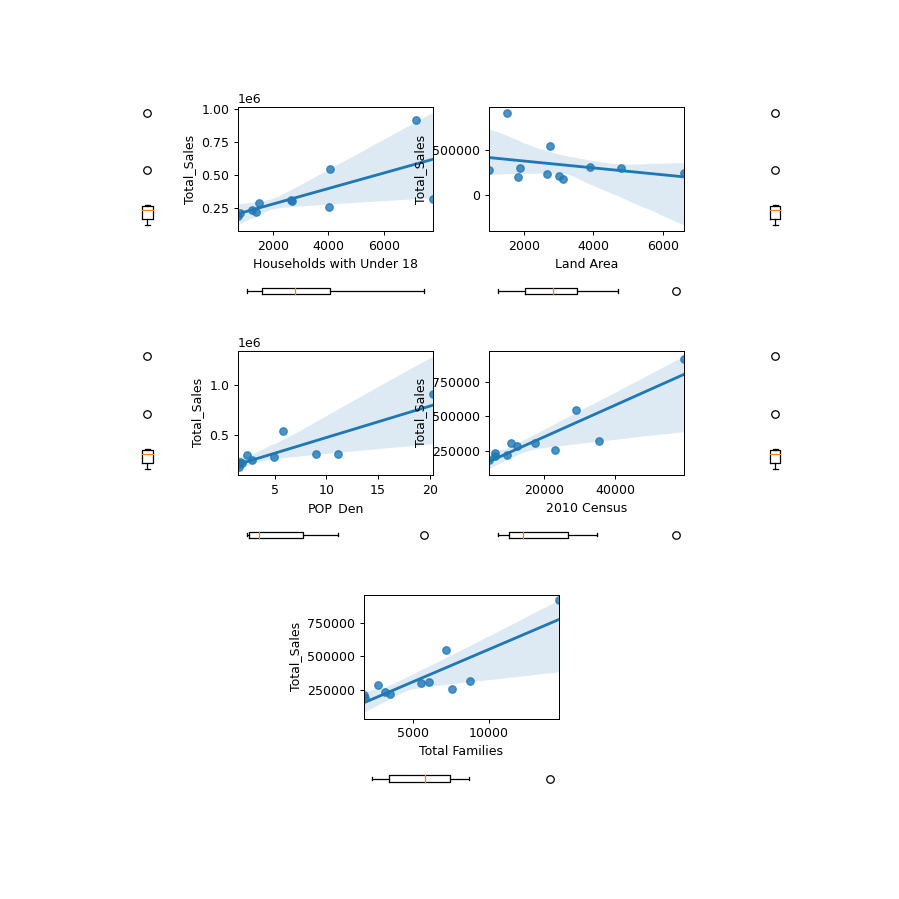

In [19]:
%matplotlib notebook
# Now lets check outlieres
# best plot to check outliers is BOX plot and reg plot at the same time 
# for better understand the relationship and outliers too.

# the Target Variable: Total_Sales
# all numerical value are predictive variable
import matplotlib.gridspec as gridspec

def plot(proj_2a):
    plt.figure(figsize=(10,10))

    # Marking the space i will be working on
    gspec = gridspec.GridSpec(9,6, wspace=.8, hspace=.9)

    # for first plot
    bp1 = plt.subplot(gspec[:2, 0])
    sp1 = plt.subplot(gspec[:2, 1:3])
    bp2 = plt.subplot(gspec[2, 1:3])

    # for second plot
    bp3 =  plt.subplot(gspec[:2, 5])
    sp2 = plt.subplot(gspec[:2, 3:5])
    bp4 = plt.subplot(gspec[2, 3:5])

    # for third plot
    bp5 =  plt.subplot(gspec[3:5, 0])
    sp3 = plt.subplot(gspec[3:5, 1:3])
    bp6 = plt.subplot(gspec[5, 1:3])

    # for fourth plot
    bp7 =  plt.subplot(gspec[3:5, 5])
    sp4 = plt.subplot(gspec[3:5, 3:5])
    bp8 = plt.subplot(gspec[5, 3:5])

    # for fifth variable
    sp5 = plt.subplot(gspec[6:8, 2:4])
    bp9 = plt.subplot(gspec[8, 2:4])

    # first pot projection
    bp1.cla()
    bp1.boxplot(proj_2a['Total_Sales'])
    bp2.cla()
    bp2.boxplot(proj_2a['Households with Under 18'], vert=False)
    sp1.cla()
    sns.regplot(x=proj_2a["Households with Under 18"], y= proj_2a["Total_Sales"], ax=sp1)




    # second projection
    bp3.cla()
    bp3.boxplot(proj_2a['Total_Sales'])
    bp4.cla()
    bp4.boxplot(proj_2a["Land Area"], vert=False)
    sp2.cla()
    sns.regplot(x=proj_2a["Land Area"], y= proj_2a["Total_Sales"], ax=sp2)

    # Third Projection
    bp5.cla()
    bp5.boxplot(proj_2a['Total_Sales'])
    bp6.cla()
    bp6.boxplot(proj_2a["POP_Den"], vert=False)
    sp3.cla()
    sns.regplot(x=proj_2a["POP_Den"], y= proj_2a["Total_Sales"], ax=sp3)

    # fourth projection
    bp7.cla()
    bp7.boxplot(proj_2a['Total_Sales'])
    bp8.cla()
    bp8.boxplot(proj_2a['2010 Census'], vert=False)
    sp4.cla()
    sns.regplot(x=proj_2a["2010 Census"], y= proj_2a["Total_Sales"], ax=sp4)

    # for fifth projection

    bp9.cla()
    bp9.boxplot(proj_2a["Total Families"], vert=False)
    sp5.cla()
    sns.regplot(x=proj_2a["Total Families"], y= proj_2a["Total_Sales"], ax=sp5)
    
    
    ## remove the spines / ractangular around box plot, as it seems quite annoying
    for g in [bp1, bp2, bp3, bp4, bp5, bp6, bp7, bp8, bp9]:
        for spine in g.spines.values():
            spine.set_visible(False)
    # removing the tickmarker in all box plt including x_axis and y_axis labels
    for ax in [bp1, bp2, bp3, bp4, bp5, bp6, bp7, bp8, bp9]:
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False )


plot(proj_2a)
plt.savefig("with all the data.jpg")


### Without Outliers in the Total sales:
#### Lets see if any relationship exists

In [20]:

proj_2a

,ADDRESS,CITY,STATE,ZIP,Total_Sales,County,Land Area,Households with Under 18,POP_Den,Total Families,2010 Census
0,509 Fort St # A,Buffalo,WY,82834,185328,Johnson,3115.507500,746,1.55,1819.50,4585
1,601 SE Wyoming Blvd Unit 252,Casper,WY,82609,317736,Natrona,3894.309100,7788,11.16,8756.32,35316
2,3769 E Lincolnway,Cheyenne,WY,82001,917892,Laramie,1500.178400,7158,20.34,14612.64,59466
3,2625 Big Horn Ave,Cody,WY,82414,218376,Park,2998.956960,1403,1.82,3515.62,9520
4,123 S 2nd St,Douglas,WY,82633,208008,Converse,1829.465100,832,1.46,1744.08,6120
5,932 Main St,Evanston,WY,82930,283824,Uinta,999.497100,1486,4.95,2712.64,12359
6,200 E Lakeway Rd,Gillette,WY,82718,543132,Campbell,2748.852900,4052,5.80,7189.43,29087
7,180 S Bent St,Powell,WY,82435,233928,Park,2673.574550,1251,1.62,3134.18,6314
8,512 E Main St,Riverton,WY,82501,303264,Fremont,4796.859815,2680,2.34,5556.49,10615
9,2706 Commercial Way,Rock Springs,WY,82901,253584,Sweetwater,6620.201916,4022,2.78,7572.18,23036


In [21]:
# function for defining outliers threshold
def outlier(df, clm="Total_Sales"):
    IQR = df[clm].quantile(q= 0.75) - df[clm].quantile(q= 0.25)
    outlier_thres = df[clm].quantile(q= 0.75) + IQR * 1.5
    low_outlier_thres = df[clm].quantile(q= 0.25) - IQR * 1.5
    
    return (outlier_thres, low_outlier_thres)

# outlier(proj_2a, "Households with Under 18") # an exmple

# Function for returning  Dataframe with out the outlier given column name where you don't want outliers
def no_outliers(df, clm="Total_Sales"):
    return df[~((df[clm].gt(outlier(proj_2a, clm)[0]) | (df[clm].lt(outlier(proj_2a, clm)[1]))) )]

no_outliers(proj_2a)

,ADDRESS,CITY,STATE,ZIP,Total_Sales,County,Land Area,Households with Under 18,POP_Den,Total Families,2010 Census
0,509 Fort St # A,Buffalo,WY,82834,185328,Johnson,3115.507500,746,1.55,1819.50,4585
1,601 SE Wyoming Blvd Unit 252,Casper,WY,82609,317736,Natrona,3894.309100,7788,11.16,8756.32,35316
3,2625 Big Horn Ave,Cody,WY,82414,218376,Park,2998.956960,1403,1.82,3515.62,9520
4,123 S 2nd St,Douglas,WY,82633,208008,Converse,1829.465100,832,1.46,1744.08,6120
5,932 Main St,Evanston,WY,82930,283824,Uinta,999.497100,1486,4.95,2712.64,12359
7,180 S Bent St,Powell,WY,82435,233928,Park,2673.574550,1251,1.62,3134.18,6314
8,512 E Main St,Riverton,WY,82501,303264,Fremont,4796.859815,2680,2.34,5556.49,10615
9,2706 Commercial Way,Rock Springs,WY,82901,253584,Sweetwater,6620.201916,4022,2.78,7572.18,23036
10,1842 Sugarland Dr Ste 113,Sheridan,WY,82801,308232,Sheridan,1893.977048,2646,8.98,6039.71,17444


<IPython.core.display.Javascript object>


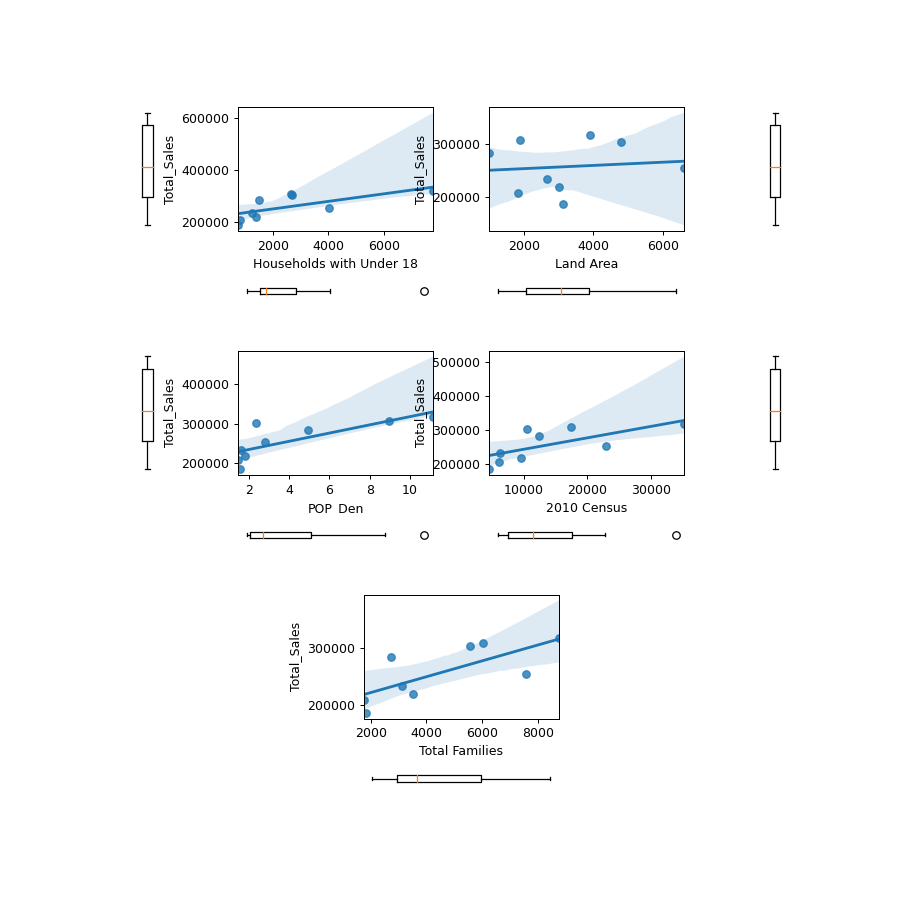

In [23]:
# no_sale_outliers = proj_2a[~((proj_2a["Total_Sales"] > outlier_thres) | (proj_2a["Total_Sales"] < low_outlier_thres))]
# no_sale_outliers

## without any outliers in sales columns
# 6 and 2 row has been removed

#no_outliers(proj_2a)
plot(no_outliers(proj_2a))
plt.savefig("without sales outliers.png")

The Slop has been greatly reduced, if Data were ploted without the sales outliers

### Removing Outliers other than total Sales data,
#### where it removes 2nd indexed row, which included one of the outlier from total sales

<IPython.core.display.Javascript object>


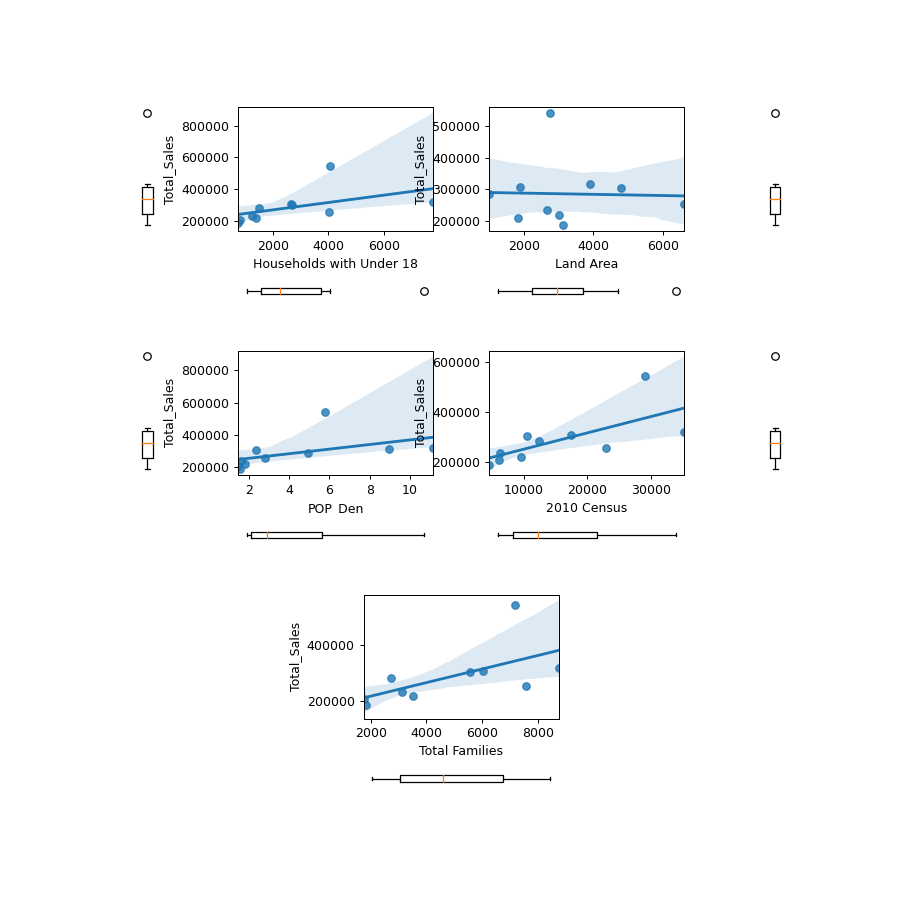

In [25]:
plot(no_outliers(proj_2a, "POP_Den")) ## removes the 2nd indexd where most of the column have outliers
plt.savefig("removing the outliers most have common.png")

<IPython.core.display.Javascript object>


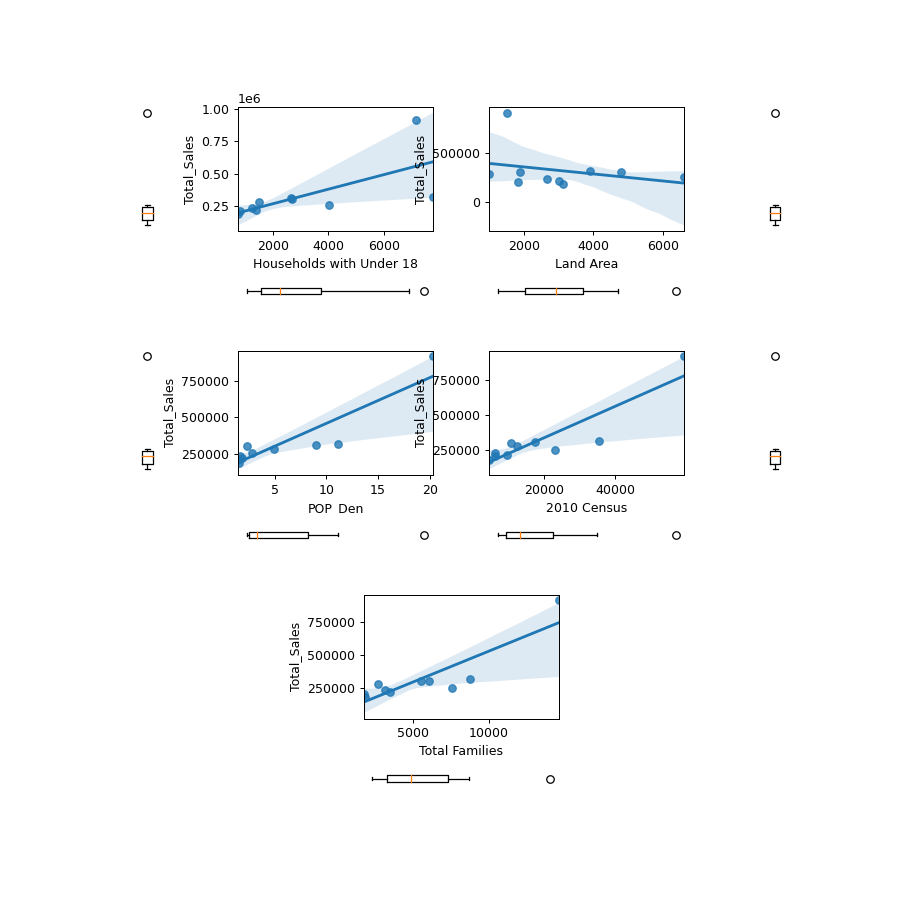

In [26]:


#no_outliers(proj_2a, "Total Families")  #2
#no_outliers(proj_2a, "Households with Under 18") # no
#no_outliers(proj_2a, "Land Area")  #9
#no_outliers(proj_2a, "POP_Den")   #2

#no_outliers(proj_2a, "2010 Census")  # 2

# all have in 3rd row in common to have outliers
# lets remove it and see it
# dataframe without 6th indexed row
plot(proj_2a[~(proj_2a.index == 6)]) # plot without 6th index or 7th row. removing of which doesn't affact the orginal slop
plt.savefig("outliers_having_no_effects.png")

### Decide to delete the 7th row

Becaues removing 2nd row make the slop flatter or decrease at a great deal, which hamper the model
But removing 6th index row which is also an outlier, make it approximate same as with all the observation 

In [29]:
proj_2a_final = proj_2a[~(proj_2a.index == 6)]
proj_2a_final


,ADDRESS,CITY,STATE,ZIP,Total_Sales,County,Land Area,Households with Under 18,POP_Den,Total Families,2010 Census
0,509 Fort St # A,Buffalo,WY,82834,185328,Johnson,3115.507500,746,1.55,1819.50,4585
1,601 SE Wyoming Blvd Unit 252,Casper,WY,82609,317736,Natrona,3894.309100,7788,11.16,8756.32,35316
2,3769 E Lincolnway,Cheyenne,WY,82001,917892,Laramie,1500.178400,7158,20.34,14612.64,59466
3,2625 Big Horn Ave,Cody,WY,82414,218376,Park,2998.956960,1403,1.82,3515.62,9520
4,123 S 2nd St,Douglas,WY,82633,208008,Converse,1829.465100,832,1.46,1744.08,6120
5,932 Main St,Evanston,WY,82930,283824,Uinta,999.497100,1486,4.95,2712.64,12359
7,180 S Bent St,Powell,WY,82435,233928,Park,2673.574550,1251,1.62,3134.18,6314
8,512 E Main St,Riverton,WY,82501,303264,Fremont,4796.859815,2680,2.34,5556.49,10615
9,2706 Commercial Way,Rock Springs,WY,82901,253584,Sweetwater,6620.201916,4022,2.78,7572.18,23036
10,1842 Sugarland Dr Ste 113,Sheridan,WY,82801,308232,Sheridan,1893.977048,2646,8.98,6039.71,17444


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# value 1 means no correlation among variables, more than 10 means higly correlated  
def calc_VIF(x):
  vif= pd.DataFrame()
  vif['variables']=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)


In [87]:
x=proj_2a_final.iloc[:,[4,6,7,8,9,10]]
calc_VIF(x)

,variables,VIF
0,Total_Sales,39.540631
1,Land Area,21.862363
2,Households with Under 18,56.611299
3,POP_Den,63.101382
4,Total Families,129.363753
5,2010 Census,116.886514


In [31]:
proj_2a_final.to_csv("clean_data_for_test_multcolliniearity.csv")

## Mutlcollinearity Analysis

Land Area has low correlation with other potential predictive variables, but among the ***POP DEN*** variable and ***TOTAL Families*** variable, has similar correlation with other variable, and what makes me Choose the ***TOtal Families*** over **POP DEN** is **Total Families** has lower or little to no correlation with the ***Land AREA*** but other one have pretty substantial.

In [103]:
col = proj_2a_final.columns[[4, 6, 7, 8, 9, 10 ]]

d = {clm : { x: proj_2a_final[clm].corr(proj_2a_final[x]) for x in col} for clm in col }
pd.DataFrame(d)

,Total_Sales,Land Area,Households with Under 18,POP_Den,Total Families,2010 Census
Total_Sales,1.000000,-0.287078,0.674652,0.906180,0.874663,0.898755
Land Area,-0.287078,1.000000,0.189376,-0.317419,0.107304,-0.052470
Households with Under 18,0.674652,0.189376,1.000000,0.821986,0.905660,0.911562
POP_Den,0.906180,-0.317419,0.821986,1.000000,0.891680,0.944389
Total Families,0.874663,0.107304,0.905660,0.891680,1.000000,0.969190
2010 Census,0.898755,-0.052470,0.911562,0.944389,0.969190,1.000000


In [79]:
lis = []
dic = {}
for clm in proj_2a_final.columns[6:]:
    print(clm)
    dic[clm] = [proj_2a_final[clm].corr(proj_2a_final[x]) for x in proj_2a_final.columns[6:]]

dic

pd.DataFrame(dic, index=[proj_2a_final.columns[6:]])

Land Area
Households with Under 18
POP_Den
Total Families
2010 Census


,Land Area,Households with Under 18,POP_Den,Total Families,2010 Census
Land Area,1.000000,0.189376,-0.317419,0.107304,-0.052470
Households with Under 18,0.189376,1.000000,0.821986,0.905660,0.911562
POP_Den,-0.317419,0.821986,1.000000,0.891680,0.944389
Total Families,0.107304,0.905660,0.891680,1.000000,0.969190
2010 Census,-0.052470,0.911562,0.944389,0.969190,1.000000


Index(['Total_Sales', 'Land Area', 'Households with Under 18', 'POP_Den',
       'Total Families', '2010 Census'],
      dtype='object')

In [70]:
proj_2a_final['Total Families'].corr(proj_2a_final['Total Families'])

1.0

### Regression MOdel
#### With all the data

In [149]:
import statsmodels.api as sm
X = proj_2a_final[col[1:]]
Y = proj_2a_final["Total_Sales"]

## add constant 
def reg_report(X, Y):
    X = sm.add_constant(X)

    model = sm.OLS(Y, X).fit()

    print(model.summary())
    return model

reg_report(X, Y):

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:            Total_Sales   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     21.00
Date:                Fri, 03 Jun 2022   Prob (F-statistic):            0.00568
Time:                        01:03:00   Log-Likelihood:                -119.87
No. Observations:                  10   AIC:                             251.7
Df Residuals:                       4   BIC:                             253.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

IF we look at the P_values in Predictive Variable , all are more than .05, so, the model is not perfact with the choosen variable.

As we know, having high collinearity between predictive variables cause the prediction to go wrong, and reduce the effectiveness of the model in a great deal. 

## With the Choosen Variable

With the analysis and conclusion from Multiple collinearity of all the predictive variable, only **Land area** and **Total Families with some high correlation** but still contribute to the model 

In [151]:
mod = reg_report(proj_2a_final.loc[:, ["Land Area", "Total Families"]], proj_2a_final['Total_Sales'])

                            OLS Regression Results                            
Dep. Variable:            Total_Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     36.20
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           0.000203
Time:                        01:06:30   Log-Likelihood:                -124.25
No. Observations:                  10   AIC:                             254.5
Df Residuals:                       7   BIC:                             255.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.973e+05   5.64e+04      3.

### The Regression Equation

***Predict_Sales = 197,305 - 48.4249 * [ Land Area ] + 49.1358 * [Total Families] ***





## Decision Making Process

### Demographic Datasets for predicting new city

**Predict Sales** in Each City in Demographic Datasets
1. then, Demongraphic Dataset is Joint while keeping its full data, with final Analytical Datasets

In [123]:
demo2 = pd.read_csv("p2-wy-demographic-data.csv")
demo2["Pred_Sales"] = mod.params[0] + demo2["Land Area"] * mod.params[1] + demo2["Total Families"] * mod.params[2]
demo2


,City,County,Land Area,Households with Under 18,Population Density,Total Families,Pred_Sales
0,Laramie,Albany,2513.745235,2075,5.19,4668.93,305013.881671
1,Rock River,Albany,200.444000,165,0.41,372.30,205917.163533
2,Basin,Big Horn,543.951304,250,0.66,566.43,198821.571960
3,Burlington,Big Horn,137.646214,63,0.17,143.34,197708.019208
4,Byron,Big Horn,252.489592,116,0.31,262.93,198022.882117
...,...,...,...,...,...,...,...
94,Mountain View,Uinta,165.292453,246,0.82,448.60,211368.432659
95,Ten Sleep,Washakie,100.792517,46,0.17,106.26,197670.702988
96,Worland,Washakie,1294.105755,595,2.18,1364.32,201700.325919
97,Newcastle,Weston,1193.129216,386,1.47,957.04,186578.097072


In [125]:
# merge with the orginal clean data

final = demo2.merge(proj_2a_final, left_on="City", right_on="CITY", how="left")[["City", "County_x", "Land Area_x", "Households with Under 18_x"
                                                                                ,"Population Density", "Total Families_x", "Total_Sales",
                                                                                "Pred_Sales"]]
final.head()

,City,County_x,Land Area_x,Households with Under 18_x,Population Density,Total Families_x,Total_Sales,Pred_Sales
0,Laramie,Albany,2513.745235,2075,5.19,4668.93,NaN,305013.881671
1,Rock River,Albany,200.444000,165,0.41,372.30,NaN,205917.163533
2,Basin,Big Horn,543.951304,250,0.66,566.43,NaN,198821.571960
3,Burlington,Big Horn,137.646214,63,0.17,143.34,NaN,197708.019208
4,Byron,Big Horn,252.489592,116,0.31,262.93,NaN,198022.882117


## the requirement 
#1 the compittor must have low sell in the choosen new city, must be less than 500000
#2 the city where no existing Company exists 
#3 must have population over 40000 based on 2014 estimate
#4 the predicted sales must be over 200000

In [131]:
## By giving sort without competitor data
## no sales from any existing store

final = final[final["Total_Sales"].isnull()]
final.sort_values(by="Pred_Sales", ascending=False)

,City,County_x,Land Area_x,Households with Under 18_x,Population Density,Total Families_x,Total_Sales,Pred_Sales
10,Gillette,Campbell,2748.852900,4052,5.80,7189.43,NaN,417475.480601
0,Laramie,Albany,2513.745235,2075,5.19,4668.93,NaN,305013.881671
39,Torrington,Goshen,1599.818493,1034,4.39,2548.50,NaN,245081.787507
64,Mills,Natrona,281.402260,563,0.81,1138.55,NaN,239647.037970
62,Evansville,Natrona,215.894254,432,0.62,873.51,NaN,229796.317811
...,...,...,...,...,...,...,...,...
20,Saratoga,Carbon,976.042427,240,0.24,499.23,NaN,174595.668747
82,Marbleton,Sublette,1210.922140,316,0.53,655.83,NaN,170916.295329
83,Pinedale,Sublette,2585.758665,676,1.12,1400.43,NaN,140926.421922
65,Lusk,Niobrara,2211.100420,205,0.79,548.14,NaN,117191.307063


In [148]:
# Three Datasets is merged to let the users understand the requirement and make decision
# final Demographic data and ANalytic Data
# and Naics " where all the competitor's data kept" their yearly sales in each store
# group by the NAICS data with the CITY and merge with the final Analytics Data

## all done in one line, so, it is a bit messy
(naics[["PHYSICAL CITY NAME","SALES VOLUME"]].groupby("PHYSICAL CITY NAME").sum()
 .merge(final, left_on="PHYSICAL CITY NAME", right_on="City", how="right")
 .sort_values(by="Pred_Sales", ascending=False)
 .merge(pop, on="City", how="left").rename(columns={
                                                    "Land Area_x" : "Land Area",
                                                              "Households with Under 18_x" : "Households with under 18",
                                                              "Population Density" : "POP_DEN",
                                                             "Total Families_x" : "Total Families",
                                                             "SALES VOLUME" : "COMP_SALES"
                                                              })[["City", "County", "Land Area", 
                                                                  "POP_DEN", "Total Families","COMP_SALES", "Pred_Sales", 
                                                                 "2014 Estimate"]])



,City,County,Land Area,POP_DEN,Total Families,COMP_SALES,Pred_Sales,2014 Estimate
0,Gillette,Campbell,2748.852900,5.80,7189.43,1130000.0,417475.480601,31971
1,Laramie,Albany,2513.745235,5.19,4668.93,76000.0,305013.881671,32081
2,Torrington,Goshen,1599.818493,4.39,2548.50,876991.0,245081.787507,6736
3,Mills,Natrona,281.402260,0.81,1138.55,NaN,239647.037970,3690
4,Evansville,Natrona,215.894254,0.62,873.51,210000.0,229796.317811,2831
...,...,...,...,...,...,...,...,...
84,Saratoga,Carbon,976.042427,0.24,499.23,83000.0,174595.668747,1692
85,Marbleton,Sublette,1210.922140,0.53,655.83,NaN,170916.295329,1114
86,Pinedale,Sublette,2585.758665,1.12,1400.43,NaN,140926.421922,1958
87,Lusk,Niobrara,2211.100420,0.79,548.14,NaN,117191.307063,1578


As we see previously, **"Gillette"** City has an outlier in its all other predictive variable, like total_Families, Populaion density, and others, and the outlier doesn't have any effect on the model, so we exclude the **Consideration"**
of this city.

Second, Larmie complete all its requirement, except the populaiton is less then 4000, but it still is good place to start with, as in other city like **Torrington** has more than **800,000** sales of competitor, But in **Laramie** has less than **100000** of sales.

#### OUR DECISION TO INTRODUCE NEW STORE IN "LARAMIE" CITY